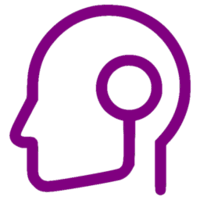

<center>
<H1> Virtual Internship Program @ AINE AI
<h2> By Shubhangi
    </center>

## Statistical Analysis and Hypothesis Testing

<p><b> Aim: </b>
Even though the overall subscription for the game is growing, the revenue from in-game purchases has been declining and many players are uninstalling the game after playing for a few days. What recommendations can you suggest increasing the in-game purchase and retaining the players?
</p>

<p><b> Objectives</b>
The overall objective of the project is to test the company’s CEO’s hypothesis that moving the first gate from level 30 to level 40 increases retention rate and the number of game rounds played. The CEO believes that players are churning because the first gate encountered at level 30 is too early which forces players to wait before they can proceed further in the game.

In order to increase player retention rate, developers ran AB-test by moving the first gate from level 30 to level 40 for some players i.e.,
-	group A would encounter the gate at level 30, and
-	group B would encounter the gate at level 40
</p>

## Packages and setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

### Reading data and initial processing

In [2]:
#Read data using pandas
user_df=pd.read_csv("S:\AINE AI\Stats Project/cookie_cats.csv")

#Check data types of each column using "dtypes" function
print("Data types for the data set:")
user_df.dtypes

#Check dimension of data i.e. # of rows and #column using pandas "shape" funtion
print("*"*120)
print("Shape of the data i.e. no. of rows and columns")
user_df.shape

#display first 5 rows of the data using "head" function
print("*"*120)
print("First 5 rows of the raw data:")
user_df.head(5)

Data types for the data set:


userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

************************************************************************************************************************
Shape of the data i.e. no. of rows and columns


(90189, 5)

************************************************************************************************************************
First 5 rows of the raw data:


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


## Exercise

## Q1. Detect and resolve problems in the data (Missing value, Outliers, etc.)

### Q1.1 Identify missing value

In [3]:
#Check for any missing values in the data using isnull() function
user_df.isnull()

,userid,version,sum_gamerounds,retention_1,retention_7
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
90184,False,False,False,False,False
90185,False,False,False,False,False
90186,False,False,False,False,False
90187,False,False,False,False,False


### Q1.2 Identify outliers

Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

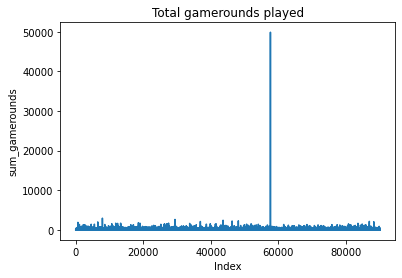

In [4]:
#Check for outlier values in sum_gamerounds column
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)

In [5]:
#Based on the plot, filter out the outlier from sum_gamerounds played; Use max() fucntion to find the index of the outlier

# Finding maximum value in sum_gameground column
index_value =  user_df.sum_gamerounds.idxmax()
print("Index of maximum value of sum_gamerounds is ", index_value)

# Finding index of maximum value
# index = user_df['sum_gamerounds'].loc[[57702]]
# print(index)
user_df.drop(index = index_value, inplace = True)

Index of maximum value of sum_gamerounds is  57702


Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

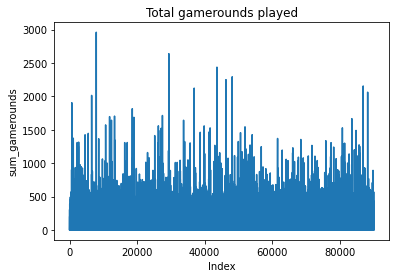

In [6]:
#Plot the graph for sum_gamerounds player after removing the outlier
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)

## Q2. Plot summary statistics and identify trends to answer basis business questions

### Q2.1 What is the overall 7-day retention rate of the game?

In [7]:
#Insert calculation for 7-day retention rate
# Calculating the retentaion 
retention = user_df.retention_7.value_counts(normalize = True) * 100
print(retention)

# Printing the rentation ratio
print("Overall 7 days retention rate of the game for both versions is: " ,round(retention[1], 2),"%")


False    81.394421
True     18.605579
Name: retention_7, dtype: float64
Overall 7 days retention rate of the game for both versions is:  18.61 %


### Q2.2 How many players never played the game after installing? 

In [8]:
# Find number of customers with sum_gamerounds is equal to zero
never_played_game = user_df.sum_gamerounds.to_list().count(0)

# printing number of people who has not played game after installing
print("Number of person who has never played game after installing:", never_played_game)


Number of person who has never played game after installing: 3994


### Q2.3 Does the number of users decrease as the level progresses highlighting the difficulty of the game?

sum_gamerounds
0    3994
1    5538
2    4606
3    3958
4    3629
Name: userid, dtype: int64

Text(0.5, 0, 'sum_gamerounds')

Text(0, 0.5, 'Count of player')

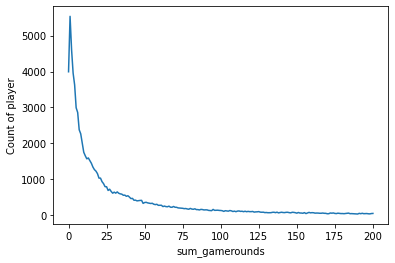

In [9]:
#Group by sum_gamerounds and count the number of users for the first 200 gamerounds
#Use plot() function on the summarized stats to visualize the chart

# grouping the dataframe based on sum_gamerounds and counting the usedid based on that
a = user_df.groupby('sum_gamerounds').userid.count()
a.head(5)

# plotting the graph of the count of sum_gamerounds
plt.xlabel("sum_gamerounds")
plt.ylabel("Count of player")
plt.plot(a[:201])
  

## Q3. Generate crosstab for two groups of players to understand if there is a difference in 7 days retention rate & total number of game rounds played

### Q3.1 Seven days retention rate summary for different game versions

In [10]:
#Create cross tab for game version and retention_7 flag counting number of users for each possible categories

pd.crosstab(user_df.version, user_df.retention_7).apply(lambda x: x/x.sum(), axis=1)

retention_7,False,True
version,,
gate_30,0.809817,0.190183
gate_40,0.818000,0.182000


<mark>__Analsysis Results:__
    
The crosstab show that retentaion rate is higher when gate is at level 30 that is 19.01% whereas retentain rate when gate is at level 40 is 18.20%.
    
We can conclude that people are playing game after 7 day more when gate is at level 30.

### Q3.2 Gamerounds summary for different game versions

In [11]:
#use pandas group by to calculate average game rounds played summarized by different versions

pd.crosstab(user_df.version, [user_df.retention_1, user_df.retention_7])


retention_1  False        True       
retention_7  False True   False True 
version                              
gate_30      22840  1825  13358  6676
gate_40      23597  1773  13613  6506

<mark>__Analsysis Results:__
    
The number of gameround played in total in each palyer differ based on different version of the game as the number of people playing game after seven days when gate is at level 30 is 6676 whereas when gate is at level 30 then it is 6506.

## Q4. Perform two-sample test for groups A and B to test statistical significance amongst the groups in the sum of game rounds played i.e., if groups A and B are statistically different

### Initial data processing

In [12]:
#Define A/B groups for hypothesis testing
user_df["version"] = np.where(user_df.version == "gate_30", "A", "B")
group_A=user_df[user_df.version=="A"]['sum_gamerounds']
group_B=user_df[user_df.version=="B"]['sum_gamerounds']


### Q4.1 Shapiro test of Normality

In [13]:
#---------------------- Shapiro Test ----------------------
# NULL Hypothesis H0: Distribution is normal
# ALTERNATE Hypothesis H1: Distribution is not normal    

#test for group_A
Shapiro_A = shapiro(group_A)
print("Shapiro test result for group A:",Shapiro_A)

#test for group_B
Shapiro_B = shapiro(group_B)
print("Shapiro test result for group B:", Shapiro_B)

Shapiro test result for group A: ShapiroResult(statistic=0.48864424228668213, pvalue=0.0)
Shapiro test result for group B: ShapiroResult(statistic=0.48256540298461914, pvalue=0.0)


<mark>__Analsysis Results:__ 

    
Since, p-value for both the test is 0.0 which is less than 0.5. Therefore, H0 will be rejected. 

Sum_gameround when gate is at level 30 and 40 it is not following normal distribution. 

### Q4.2 Test of homegienity of variance

In [14]:
#---------------------- Leven's Test ----------------------
# NULL Hypothesis H0: Two groups have equal variances
# ALTERNATE Hypothesis H1: Two groups do not have equal variances

#perform levene's test and accept or reject the null hypothesis based on the results
stats.levene(group_A, group_B)

LeveneResult(statistic=0.07510153837481241, pvalue=0.7840494387892463)

<mark>__Analsysis Results:__
    
__Type your answer here:__ 

Since, p-value is 0.78 which is geater than 0.5. Therefore, H0 will be accepted. 

Group_A and Group_B are having equal variance.  

### Q4.3 Test of significance: Two sample test

In [21]:
#---------------------- Two samples test ----------------------
# NULL Hypothesis H0: Two samples are equal
# ALTERNATE Hypothesis H1: Two samples are different

#Apply relevant two sample test to accept or reject the NULL hypothesis

stats.mannwhitneyu(group_A, group_B)


MannwhitneyuResult(statistic=1009027049.5, pvalue=0.02544577639572688)

In [22]:
#---------------------- Two samples test ----------------------
# NULL Hypothesis H0: Two samples are equal
# ALTERNATE Hypothesis H1: First sample is greater than second.

#Apply relevant two sample test to accept or reject the NULL hypothesis

stats.mannwhitneyu(group_A, group_B)


MannwhitneyuResult(statistic=1009027049.5, pvalue=0.02544577639572688)

<mark>__Analsysis Results:__
    
Since, p-value is 0.94 which is less than 0.5. Therefore, H0 will be rejected. 

Group_A and Group_B are different.  

## Q5. Based on significance testing results, if groups A and B are statistically different, which level has more advantage in terms of player retention and number of game rounds played

In [23]:
#Analyze the 1 day and 7 days retention rate for two different groups using group by function
user_df[["version","retention_7","retention_1"]].groupby("version").agg("mean")

,retention_7,retention_1
version,,
A,0.190183,0.448198
B,0.182000,0.442283


<mark>__Analsysis Results:__
    
Retentaion rate is higher when first gate is at level 30 that is 19.01%.